In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Add channel dimension (important)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [4]:
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [6]:
history = cnn_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.7436 - loss: 0.7216 - val_accuracy: 0.8602 - val_loss: 0.3810
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 33ms/step - accuracy: 0.8745 - loss: 0.3439 - val_accuracy: 0.8889 - val_loss: 0.3108
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.8921 - loss: 0.2915 - val_accuracy: 0.8953 - val_loss: 0.2863
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.9047 - loss: 0.2567 - val_accuracy: 0.8966 - val_loss: 0.2814
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.9148 - loss: 0.2282 - val_accuracy: 0.9000 - val_loss: 0.2746
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - accuracy: 0.9224 - loss: 0.2085 - val_accuracy: 0.9091 - val_loss: 0.2640
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 35ms/step - accuracy: 0.9303 - loss: 0.1905 - val_accuracy: 0.9124 - val_loss: 0.2539
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 32ms/step - accuracy: 0.9381 - loss: 0.1670 - 

In [7]:
test_loss, test_acc = cnn_model.evaluate(X_test, y_test)
test_acc


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9144 - loss: 0.2702


0.9157000184059143

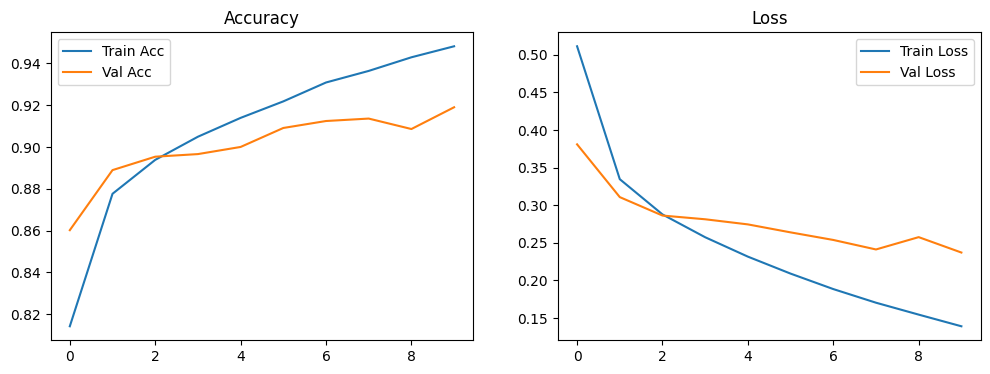

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()

plt.show()
